# Pandas: Series and DataFrame

In [2]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment', None)

# Series


In [3]:
#Creating Series
lis = [np.random.randint(0,100) for x in range(0,6) ]#List comprehension
lis

[68, 1, 22, 69, 75, 34]

In [ ]:

#Pass the list to the Series constructor
pd.Series(lis)

In [4]:
#Creating Series from Numpy Arrays

lis = np.array(lis)
print("Array:",lis)
print("Series:\n", pd.Series(lis))

Array: [68  1 22 69 75 34]
Series:
 0    68
1     1
2    22
3    69
4    75
5    34
dtype: int64


In [ ]:
label = ['James','John','Jane','Maria','Sam','Jean']

In [ ]:
s1 = pd.Series(lis,label,name="Maths")

In [ ]:
print(s1)

In [ ]:
#Creating Series from Dictionaries
marks =  {'James':90,'John':87,'Jane':76,'Maria':90,'Sam':94,'Jean':76}

In [ ]:
marks = pd.Series(marks)
marks

# Retrieving Data from Series

Using index

In [ ]:
marks['James']

In [ ]:
s1[0]

#You can change or modify the data value of a Series

In [ ]:
s1['Jane'] = 89

In [ ]:
s1

In [ ]:
s1[[0,1]]

In [ ]:
#Using loc : To specifically state that we are using labelled index

In [ ]:
s1.loc["James"]


In [ ]:
s1.loc[["James","Jane"]]


In [ ]:
#Using iloc : To specifically state that we are using numeric index

In [ ]:
s1.iloc[4]

In [ ]:
s1.iloc[[2,3]]

In [ ]:
#Deleting Values from Series

In [ ]:
s1.drop("Jane")#Note how jane's score still remains in the original Series. To  drop Janes, set the inplace parameter to true!

In [ ]:
s1

In [ ]:
#Arithmetic operations on Pandas Series

In [ ]:
s2 = s1 + 5
s2

In [ ]:
#What is the average score?
s1.mean()

In [ ]:
s1.idxmin()

In [ ]:
s1.idxmax()

In [ ]:
np.max(s1)#Highest score

In [ ]:

s1["James"] + 20

In [ ]:
s1

In [ ]:
#Lowest score?


# DataFrame
Is a two dimensional object with rows and columns, can hold and process  data of mixed types!

In [ ]:
#Let's create a DataFrame containing scores of 6 students in  6 subjects

In [5]:
score = [ np.random.randint(0,101) for x in range(0,36)]

In [6]:
scores = np.array(score)

In [ ]:
scores

In [7]:
student_score = scores.reshape(6,6)

In [ ]:
student_score

In [8]:
students = ['James','John','Jane','Maria','Sam','Jean']
subjects = ['Maths','History','Physics','Chemistry','IT','Biology']

In [9]:
df = pd.DataFrame(data= student_score, index=students,columns=subjects)

In [ ]:
df

In [ ]:
df.iloc[[0]]

In [ ]:
#Merging Dataframes
s1 = [90,87,78,95,76]
s2 = [56,67,30,32,31]
names = ['James', 'John','Jane','Maria','Samuel']
df1 = pd.DataFrame({"Maths":s1}, index= names)
df2 = pd.DataFrame({"Physics":s2}, index = names)

In [ ]:
df1

In [ ]:
df2

In [ ]:
df3 = pd.merge(df1,df2,  right_index=True, left_index=True)

In [ ]:
df3

<AxesSubplot:>

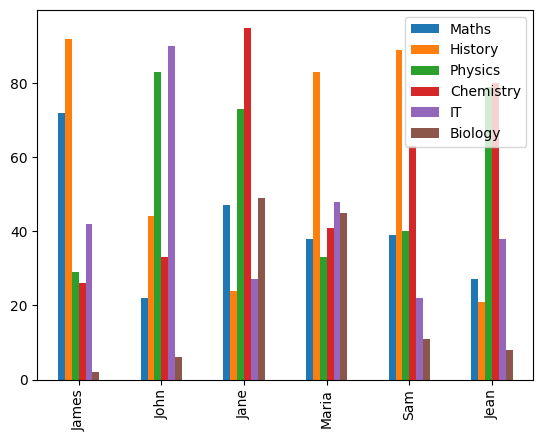

In [10]:
import matplotlib.pyplot as plt
display(df.plot(kind='bar'))
#plt.savefig('graph.png')

In [ ]:
display(df.loc['James'].plot(kind = 'bar', y='Marks'))


In [ ]:
#Let's retrieve the index of our dataframe, this contains students' names

In [ ]:
df.index#returns the index as an object

In [ ]:
#Let's retrieve the columns of our dataframe, this contains the subjects!

In [ ]:
df.columns#returns the columns as an object

In [ ]:
df.values#returns the data values as a 2-d array

In [ ]:
df.describe()#descriptive statistics of our dataframe

# Retrieving Data from DataFrame

In [ ]:
#let's retrieve all scores for Biology

x = df["Biology"]
print(type(x))

In [ ]:
#for multiple columns
df[["Biology","Chemistry"]]

In [ ]:
#What did James score in Maths? Do not use the index in the first []!
df['Maths']['James']

In [ ]:
#Retrieving a row. What did John score in all subjects?

In [ ]:
df.loc[["John"]]

In [ ]:
df.loc[["John"]]#

# Adding Columns to DataFrame

In [ ]:
#Adding new Columns. Let's add the scores of all students in Geography!
df["Geography"] = [56,78,86,34,45,70]

In [ ]:
df

In [ ]:
#Adding new rows. Let's add the scores for Patrick.
Patrick = {"Maths":78,"History":67,"Physics":90,"Chemistry":76,"IT":98,"Geography":78}


In [ ]:
patrick_df = pd.DataFrame(Patrick, index=["Patrick"])

In [ ]:
patrick_df

In [ ]:
df_1 = df.append(patrick_df, sort=False)
df_1


In [ ]:
#df.fillna(df['Biology'].mean())

In [ ]:
df_1['Biology']['Patrick'] = 89
df_1

In [ ]:
#Inserting columns to specific location. Let's add scores for new subject(Arts) at column(0)

df.insert(0,"Arts",[90,67,88,98,67,85])

In [ ]:
df

# Deletion
You can delete using pop and drop functions of DataFrame

In [ ]:
# Deleting using pop and drop functions
#Pop deletes columns, drop deletes both columns and rows


In [ ]:
df.pop("Geography")

In [ ]:
df

In [ ]:
#Deleting columns using drop function, remember to set the axis to 1
dropped = df.drop(["Arts", "Biology"], axis=1)
dropped

In [ ]:
#deleting rows using drop function...remember to set the axis to 0.
dropped = df.drop(["James", "John"], axis=0)
dropped

In [ ]:
#Changing row/columns label using rename function
df.rename(columns={"IT":"Computing"})

In [ ]:
#Changing row/columns label using rename function
df.rename(index={"Sam":"Samuel"})

# Cleaning Data 
How to deal with missing values.

In [11]:
import math
NaN = float('nan')
df["Agriculture"] = [56,78,NaN,34,NaN,70]

#df["Maths"]["Jean"]=NaN
#df["Biology"]["Jean"]=NaN

In [15]:
df_null = df.isnull()
df_null


,Maths,History,Physics,Chemistry,IT,Biology,Agriculture
James,False,False,False,False,False,False,False
John,False,False,False,False,False,False,False
Jane,False,False,False,False,False,False,True
Maria,False,False,False,False,False,False,False
Sam,False,False,False,False,False,False,True
Jean,False,False,False,False,False,False,False


In [ ]:
df_null["Maths"]

In [ ]:
df_null.sum()#number of NaN in the DF

In [ ]:
df.count()#counts the number of non null values

In [ ]:
#Dealing with NaN values: This can be achieved by using dropna function  or fillna function.

In [ ]:
df.dropna(axis=0)#drops the rows with the missing values

In [ ]:
df.dropna(axis=1)#drops the columns with the missing values

In [ ]:

#Filling missing values with 0
df.fillna(0)

In [ ]:
# forward fill:replaces missing values from previous item in the column or row

df.fillna(method='ffill', axis=0)

In [ ]:
df

In [ ]:
#propagate non-null values forward
df.fillna(method='ffill', axis=1)

In [ ]:
#propagate non-null values backward
df.fillna(method='backfill',axis=0)#Backward fill

In [ ]:
df

In [ ]:
#Filling missing values using interpolation functions
df.interpolate(method='linear',axis=1)

In [ ]:
#Loading data into DataFrames. We can load data files into Pandas DataFrame.
#This is a real-world data containing labelled smartphone sensor data


In [ ]:
#Link to User context recognition using smartphone sensors and classification models
#https://www.sciencedirect.com/science/article/pii/S1084804516300261
context = pd.read_csv("mobile_context.csv", index_col=0)

In [ ]:
context.head(20)

In [ ]:
context.tail(10)

In [ ]:
context.isnull().any()

In [ ]:
time =  context['time']

In [ ]:
time.head(20)

In [ ]:
context.describe()

In [ ]:
context.columns

In [ ]:
context["lux"].describe()

In [ ]:
#Retrieve specific columns into a new DataFrame?

#Let's load another data from CSV file

In [ ]:
pop = pd.read_csv("state-population.csv")

In [ ]:
pop.head()

In [ ]:
population = pop.rename(columns={"state/region":"state"})#Changes the column label

In [ ]:
population.head()

In [ ]:
%matplotlib inline
population.groupby(['year'])['population'].mean().plot()

In [ ]:
population.groupby(['state'])['population'].mean()

In [ ]:
population.groupby(['state','year'])['population'].mean()

In [ ]:
%%time
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
wine = pd.read_csv(url,sep=';')

#You can use the pd.to_csv() to persist the wine data to your local drive.

In [ ]:
wine.head()#Displays the first 5 records of the wine DataFrame, you can change the number of records to be displayed.

In [ ]:
wine.info()#Displays the total number of entries, columns( with data types) and the memory usage of the dataset

In [ ]:
wine.values#

In [ ]:
#What is the average alcohol % per vol?

wine['alcohol'].mean()

In [ ]:
#Let's group the wine according to quality and visualize the grouping

wine.groupby("quality").plot()

In [ ]:
wine.head()

In [ ]:
wine.plot(kind="scatter",x="quality",y="alcohol")

In [ ]:
#Compute the wine quality and alcohol ratio

In [ ]:
wine['qual_alc ratio'] = wine['quality']/wine['alcohol']

In [ ]:
wine.head()

In [ ]:
#Sort the wine in descending order of quality

In [ ]:
wino= wine.sort_values(by='quality', ascending=False)

In [ ]:
wino.head(5)